 # Clustering KMeans


Steps:
1. <span class="girk">load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible)</span>)
2. <span class="girk">standardise the data using standardscaler</span>
3. <span class="girk">save the scaler for future use for the new user input song. save it using pickle</span>
4. <span class="girk">build the elbow graph to find the best k.</span>
5. <span class="girk">choosing the number of clusters k.</span>
6. <span class="girk">fitting  k means cluster.</span>
7. <span class="girk">use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict</span>
8. s<span class="girk">ave the model with the best k as your final model  using pickle.</span></div><i class="fa fa-lightbulb-o "></i>

# Importing libraries

In [19]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from csv import DictReader
import random

## Loading the Audio Features dataset

In [72]:
df = pd.read_csv (r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week6\audio_features_1.csv")
df
df.drop(['id'], axis = 1, inplace = True) 

In [73]:
cols = list(df.columns.values)
cols

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [74]:
X = df
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.795,0.594,0,-6.200,1,0.0748,0.11200,0.000000,0.1620,0.409,135.002,275080,4
1,0.693,0.713,10,-4.489,0,0.3510,0.34300,0.000000,0.1020,0.615,137.335,266080,4
2,0.400,0.366,8,-9.405,0,0.0597,0.24200,0.000000,0.1260,0.161,73.313,272187,3
3,0.543,0.644,1,-5.952,1,0.3330,0.11300,0.000000,0.0733,0.706,97.410,227147,4
4,0.824,0.733,1,-5.474,1,0.0613,0.03620,0.000000,0.3250,0.395,97.972,284387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,0.503,0.791,7,-5.177,1,0.0499,0.00241,0.000000,0.2980,0.417,173.921,166037,4
5627,0.511,0.766,4,-3.178,1,0.0740,0.01040,0.004790,0.3900,0.603,160.866,159129,4
5628,0.799,0.653,2,-5.453,0,0.0370,0.01900,0.000000,0.0935,0.236,104.019,215281,4
5629,0.836,0.743,10,-6.305,0,0.0656,0.09950,0.000000,0.3350,0.722,108.966,191822,4


## Scaling features

In [75]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000
mean,0.666676,0.647182,5.112591,-6.871394,0.604866,0.126311,0.206290,0.026743,0.187178,0.520345,121.323997,209095.671994,3.966081
std,0.154357,0.178069,3.635639,2.784200,0.488923,0.118466,0.233705,0.122049,0.153314,0.227610,28.477250,58062.299527,0.304648
min,0.000000,0.004540,0.000000,-33.913000,0.000000,0.000000,0.000005,0.000000,0.021000,0.000000,0.000000,14533.000000,0.000000
25%,0.569000,0.525000,1.000000,-8.243000,0.000000,0.043200,0.026300,0.000000,0.095500,0.343000,98.333500,174358.000000,4.000000
50%,0.684000,0.656000,5.000000,-6.396000,1.000000,0.071900,0.111000,0.000000,0.127000,0.521000,120.046000,204467.000000,4.000000
75%,0.776000,0.779500,8.000000,-5.012500,1.000000,0.174000,0.313000,0.000159,0.228000,0.696000,141.008500,236100.000000,4.000000
max,0.981000,0.998000,11.000000,0.175000,1.000000,0.940000,0.991000,0.992000,0.990000,1.000000,207.750000,776200.000000,5.000000


In [76]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.795,0.594,0,-6.200,1,0.0748,0.1120,0.0,0.1620,0.409,135.002,275080,4
1,0.693,0.713,10,-4.489,0,0.3510,0.3430,0.0,0.1020,0.615,137.335,266080,4
2,0.400,0.366,8,-9.405,0,0.0597,0.2420,0.0,0.1260,0.161,73.313,272187,3
3,0.543,0.644,1,-5.952,1,0.3330,0.1130,0.0,0.0733,0.706,97.410,227147,4
4,0.824,0.733,1,-5.474,1,0.0613,0.0362,0.0,0.3250,0.395,97.972,284387,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831420,-0.298689,-1.406368,0.241166,0.808244,-0.434858,-0.403494,-0.219135,-0.164242,-0.489236,0.480356,1.136541,0.111350
1,0.170557,0.369651,1.344425,0.855759,-1.237250,1.896820,0.585021,-0.219135,-0.555632,0.415900,0.562288,0.981521,0.111350
2,-1.727808,-1.579204,0.794266,-0.910075,-1.237250,-0.562332,0.152813,-0.219135,-0.399076,-1.578915,-1.686092,1.086711,-3.171422
3,-0.801302,-0.017874,-1.131288,0.330248,0.808244,1.744864,-0.399215,-0.219135,-0.742846,0.815742,-0.839833,0.310923,0.111350
4,1.019313,0.481977,-1.131288,0.501946,0.808244,-0.548824,-0.727864,-0.219135,0.899032,-0.550750,-0.820096,1.296849,0.111350


In [77]:
#All the features have the same weight
X_scaled_df.describe() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03,5.631000e+03
mean,2.998844e-16,-8.316716e-16,1.758691e-17,-1.429442e-16,2.452507e-16,7.212211e-17,1.674700e-16,9.521380e-16,1.460975e-16,-2.325829e-16,1.875411e-16,8.442506e-17,1.247507e-15
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-4.319431e+00,-3.609272e+00,-1.406368e+00,-9.713386e+00,-1.237250e+00,-1.066318e+00,-8.827538e-01,-2.191346e-01,-1.084007e+00,-2.286328e+00,-4.260761e+00,-3.351227e+00,-1.301974e+01
25%,-6.328467e-01,-6.862131e-01,-1.131288e+00,-4.926830e-01,-1.237250e+00,-7.016244e-01,-7.702289e-01,-2.191346e-01,-5.980323e-01,-7.792315e-01,-8.074002e-01,-5.983359e-01,1.113496e-01
50%,1.122450e-01,4.952192e-02,-3.097145e-02,1.707621e-01,8.082444e-01,-4.593394e-01,-4.077734e-01,-2.191346e-01,-3.925529e-01,2.876652e-03,-4.488182e-02,-7.972614e-02,1.113496e-01
75%,7.083184e-01,7.431347e-01,7.942662e-01,6.677174e-01,8.082444e-01,4.025876e-01,4.566422e-01,-2.178317e-01,2.662859e-01,7.718032e-01,6.912975e-01,4.651336e-01,1.113496e-01
max,2.036525e+00,1.970296e+00,1.619504e+00,2.531075e+00,8.082444e-01,6.869151e+00,3.357998e+00,7.909441e+00,5.236931e+00,2.107539e+00,3.035183e+00,9.768037e+00,3.394122e+00


## Saving the scaled value with pickle

In [78]:
with open(r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week6\scaler.pickle", "wb") as f: #opening the file in the harddisk, saving the model in kmeans, wb = write binary
    pickle.dump(scaler,f)

In [79]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f:  # rb = read binary
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [80]:
scaler2 = load(r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week6\scaler.pickle")
type(scaler2)

sklearn.preprocessing._data.StandardScaler

## Build the elbow graph to find the best K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

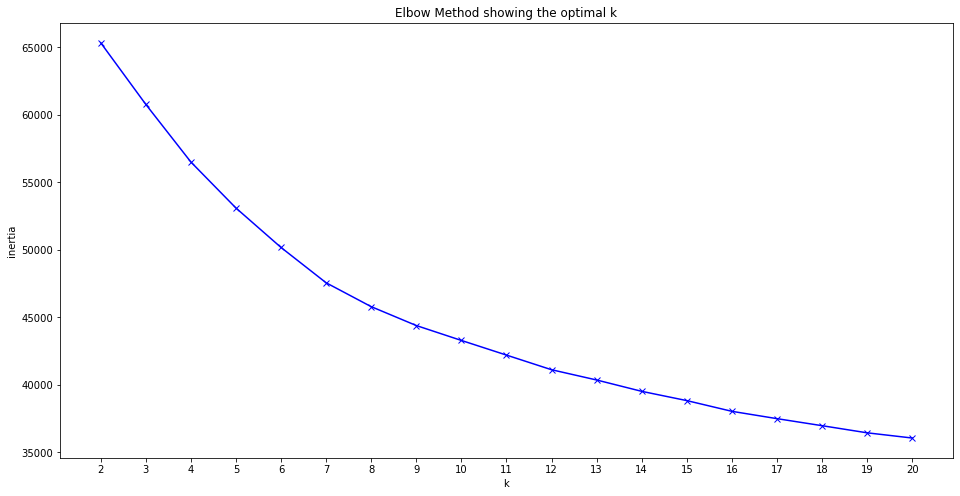

In [81]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [82]:
#inertia is the distance intracluster, the distance between a observation and the centroid
for i in range(1,len(inertia)):
    print(i+1,inertia[i]-inertia[(i-1)])


2 -4563.748786884302
3 -4268.6029429610935
4 -3409.6983617673395
5 -2922.2332521898643
6 -2615.869953054753
7 -1767.950160188433
8 -1398.471616377814
9 -1103.6219223669104
10 -1084.890388268046
11 -1084.9640231713565
12 -759.6397267219727
13 -840.6568368921871
14 -685.8657106762694
15 -794.0824739137024
16 -542.6182548806682
17 -521.0187848842106
18 -528.2340574975606
19 -385.4583492074962


<b> based on the graph 7 or 11 cluster is ok

## Chosing K

We will pick manually the number of clusters we want - let's set it to 7. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [83]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=11, random_state=1234)

## Fitting K mean cluster

In [84]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()
kmeans.inertia_

42202.41388953356

### Adding cluster column to DF

In [85]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters


In [86]:
X.to_csv(r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week6\audio_features_without_id.csv", index=False)

### Saving the model with pickle

In [87]:
with open(r"C:\Users\Barbara\OneDrive\Documents\GitHub\IHLabs_BV\Week6\kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)